In [45]:
import numpy as np
import pandas as pd
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt 
from matplotlib import pyplot
plt.rc("font", size=14)
import seaborn as sb
sb.set(style="white") #white background style for seaborn plots
sb.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter(action='ignore')
# general imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#splitting imports
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
#model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
#evaluation imports
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

In [46]:
data=pd.read_csv("DS3_C6_S2_Classification_HouseGrade_Data_Project.csv")
data.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


In [3]:
data.isnull().sum() #missing values

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

In [4]:
data.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

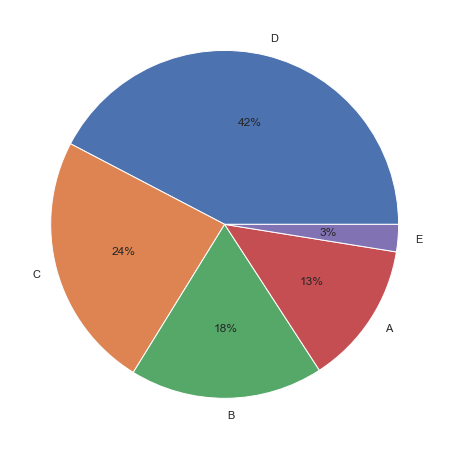

In [49]:
value1 = data['Grade'].value_counts()
fig = plt.figure(figsize = (12,8))
plt.pie(value1, labels = value1.index, autopct = '%.f%%')
plt.show()

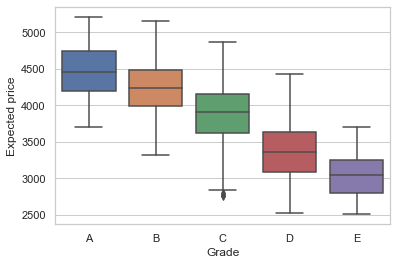

In [71]:
sb.set_style('whitegrid')
ax=sb.boxplot(x='Grade',y='Expected price',data=data,order=["A", "B", "C","D","E"])

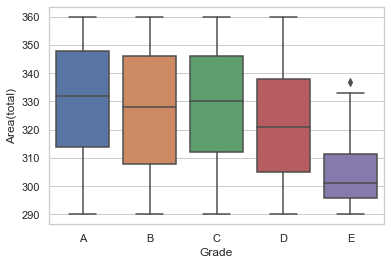

In [72]:
sb.set_style('whitegrid')
ax=sb.boxplot(x='Grade',y='Area(total)',data=data,order=["A", "B", "C","D","E"])

<AxesSubplot:xlabel='Grade', ylabel='Nbedrooms'>

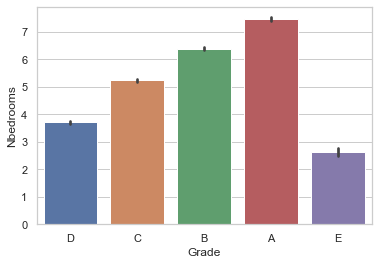

In [55]:
sb.set(style="whitegrid")
sb.barplot(x='Grade', y="Nbedrooms", data=data)

Text(0, 0.5, 'Count')

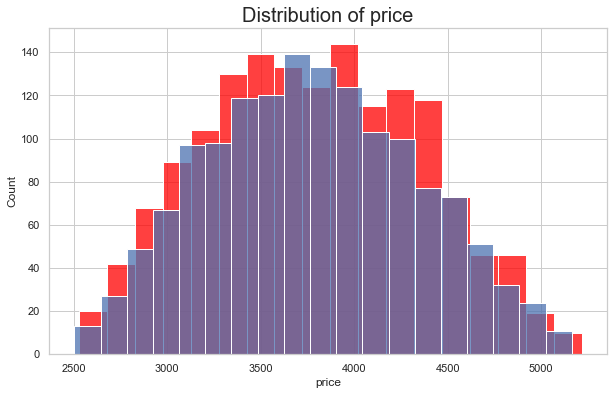

In [68]:
data2=data[(data.roof=='YES')]
data3=data[(data.roof=='NO')]
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.histplot(data2['Expected price'],color='red')
sns.histplot(data3['Expected price'])
plt.title('Distribution of price', fontsize = 20)
plt.xlabel('price')
plt.ylabel('Count')

<AxesSubplot:>

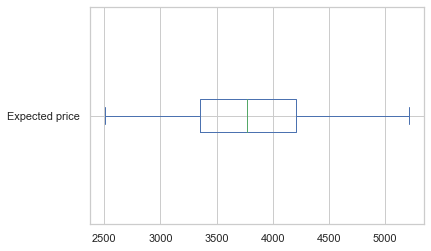

In [51]:
data['Expected price'].plot(kind='box', vert=False)

<AxesSubplot:xlabel='Grade', ylabel='Nbedrooms'>

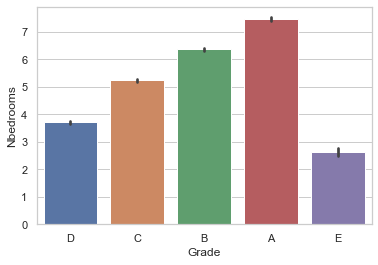

In [7]:
sb.set(style="whitegrid")
sb.barplot(x='Grade', y="Nbedrooms", data=data)

Text(0.5, 1.0, 'Grade vs expected price with respect to trooms')

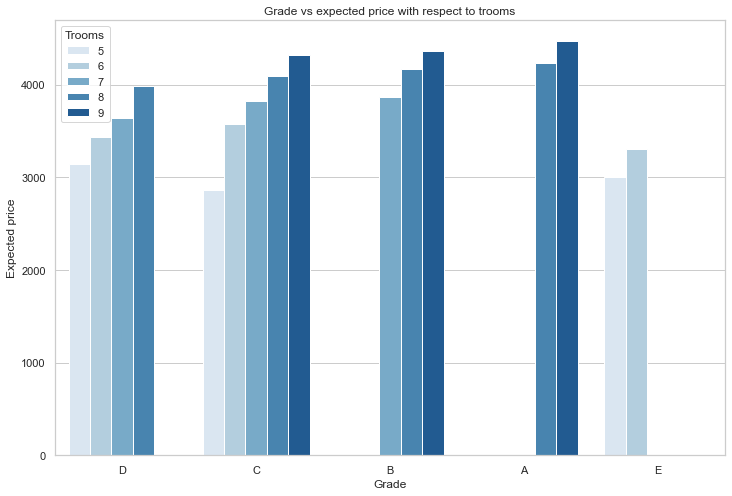

In [70]:
plt.figure(figsize=(12,8))
sb.barplot(data=data,x='Grade',y='Expected price',hue='Trooms',ci=True,palette='Blues')
plt.title('Grade vs expected price with respect to trooms')

In [8]:
#Converting Categorical column to Numerical column.
data['roof']=data['roof'].astype('category')
data['roof']=LabelEncoder().fit_transform(data['roof'])

In [9]:
data['Grade']=data['Grade'].astype('category')
data['Grade']=LabelEncoder().fit_transform(data['Grade'])

In [10]:
# Converting non-numeric labeled column into categorical column
#for i in data.columns:
    #if data[i].dtypes == 'object':
       # data[i] = data[i].astype('category')
   # else:
        #continue
        
# Using Label Encoder technique to convert categorical column into numerical type
#from sklearn import preprocessing
#label_encoder = preprocessing.LabelEncoder()

#for i in data.columns:
    #if data[i].dtypes == 'category':
       # data[i + '_encode'] = label_encoder.fit_transform(data[i])
        #print('\n',i + '_encode has unique values : ',data[i + '_encode'].unique())
   # else:
       # continue
        
# Defining method to perform data scaling operation based on the type of scaling
#def feature_scale(scale):
   # numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
   # new_df = data.select_dtypes(include = numerics)
   # scaler = MinMaxScaler()
    #df_scaled = pd.DataFrame(scaler.fit_transform(new_df.to_numpy()), columns = new_df.columns)
   # return df_scaled

# scaling the data using MinMax Scaling process
#data_df_scaled = feature_scale('minmax')
#data_df_scaled

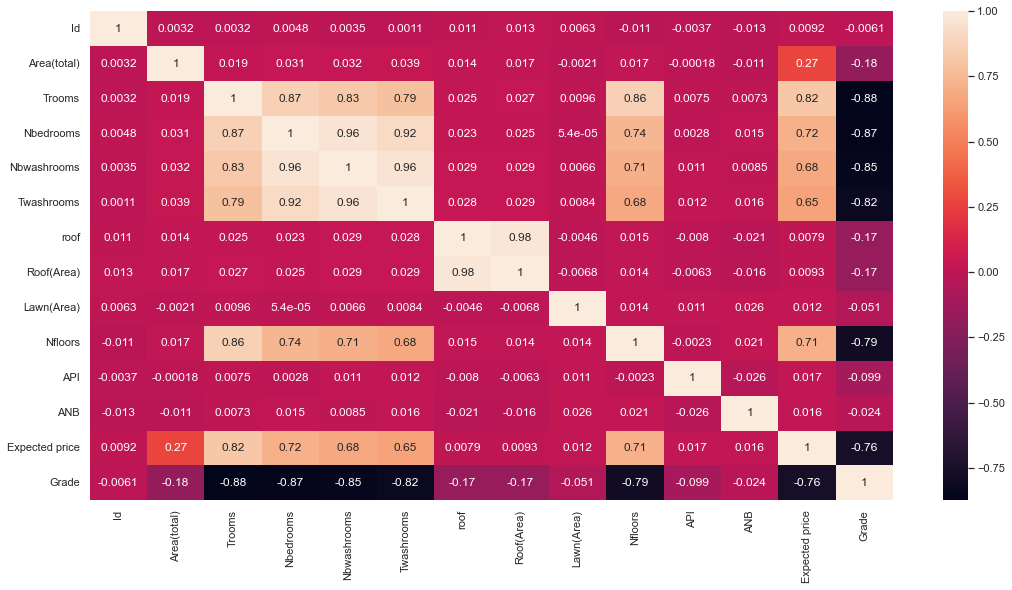

In [11]:
data_corr=data.corr() #checking correlation
fig, ax = plt.subplots(figsize = (18, 9))
sb.heatmap(data_corr,annot=True);

In [12]:
abs(data_corr['Grade']).sort_values(ascending=False) #correlation with target column

Grade             1.000000
Trooms            0.875145
Nbedrooms         0.865389
Nbwashrooms       0.847319
Twashrooms        0.819280
Nfloors           0.787623
Expected price    0.760820
Area(total)       0.177332
Roof(Area)        0.170259
roof              0.166635
API               0.099000
Lawn(Area)        0.051200
ANB               0.024025
Id                0.006074
Name: Grade, dtype: float64

In [13]:
data.drop(columns=['Id','ANB','Lawn(Area)','API'],inplace=True) #dropping features due to low correlation
data

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Nfloors,Expected price,Grade
0,339,6,5,4,6,0,0,2,3481,3
1,358,5,4,3,4,1,71,3,3510,3
2,324,7,5,4,5,1,101,5,3748,2
3,330,6,4,3,5,1,101,2,3134,3
4,320,7,4,4,5,0,0,3,3843,3
...,...,...,...,...,...,...,...,...,...,...
2995,341,9,6,5,7,1,95,5,4246,1
2996,292,9,8,7,8,1,116,7,3753,0
2997,328,7,4,3,5,0,0,5,3607,3
2998,293,9,7,7,8,0,0,7,4198,1


In [14]:
#data_df_scaled.dtypes

In [15]:
#seperating dependent and independent column
x=data.drop(columns='Grade').to_numpy()
y=data['Grade'].to_numpy()

In [16]:
#splitting data
cv = RepeatedStratifiedKFold(n_splits=3,n_repeats=3,random_state=1)
for train, test in cv.split(x,y):
  x_train, x_test=x[train],x[test]
  y_train, y_test=y[train],y[test]

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2000, 9)
(1000, 9)
(2000,)
(1000,)


In [18]:
model1=LogisticRegression() #building model

In [19]:
classifier1=model1.fit(x_train, y_train) #fitting model

In [20]:
y1_pred=classifier1.predict(x_test) #predicting values
y1_pred 

array([3, 3, 0, 3, 1, 3, 1, 3, 1, 3, 2, 2, 1, 0, 2, 2, 1, 3, 3, 3, 3, 2,
       2, 3, 1, 2, 3, 3, 2, 2, 2, 2, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 2, 1, 1, 3, 3, 3, 1, 3, 2, 1, 2, 2, 3, 0,
       2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 1, 1, 3, 3, 3, 3, 3, 2,
       2, 2, 2, 3, 3, 3, 1, 2, 3, 3, 3, 1, 1, 3, 0, 1, 2, 2, 1, 3, 2, 3,
       2, 3, 2, 0, 2, 3, 3, 2, 3, 3, 3, 1, 2, 3, 3, 3, 0, 2, 0, 3, 3, 3,
       3, 0, 3, 3, 2, 0, 3, 3, 3, 2, 1, 2, 3, 3, 1, 1, 2, 2, 2, 1, 3, 2,
       3, 3, 3, 3, 0, 2, 0, 2, 3, 3, 3, 0, 0, 0, 2, 2, 3, 2, 1, 2, 2, 3,
       3, 3, 0, 0, 1, 0, 0, 0, 2, 3, 0, 0, 3, 3, 1, 3, 3, 3, 1, 0, 2, 1,
       3, 3, 3, 2, 1, 3, 2, 0, 0, 1, 2, 2, 2, 2, 3, 3, 3, 3, 1, 3, 1, 0,
       3, 3, 0, 2, 3, 3, 3, 3, 1, 1, 3, 0, 3, 2, 3, 0, 3, 3, 2, 3, 3, 2,
       3, 1, 1, 0, 3, 3, 2, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 1, 1, 3, 0,
       0, 1, 3, 1, 0, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 2, 3, 3, 2, 3, 0,
       3, 3, 3, 2, 1, 1, 2, 3, 3, 2, 3, 3, 3, 3, 3,

In [21]:
scoring=['f1_weighted','accuracy','precision_weighted','recall_weighted']
scores1 = cross_validate(model1, x, y, scoring=scoring, cv=cv) #model evaluation

In [22]:
m1s1=(scores1['test_accuracy'])
m1s2=(scores1['test_f1_weighted'])
m1s3=(scores1['test_precision_weighted'])
m1s4=(scores1['test_recall_weighted'])
print(f'''Accuracy:{mean(m1s1)}
F1-Score:{mean(m1s2)}
Precision:{mean(m1s3)}
Recall:{mean(m1s4)}''')

Accuracy:0.5467777777777778
F1-Score:0.5239093561710263
Precision:0.5093979080262654
Recall:0.5467777777777778


In [23]:
print(scores1)

{'fit_time': array([0.12602067, 0.16245198, 0.13056636, 0.12958932, 0.11162686,
       0.13056588, 0.11461902, 0.13113523, 0.11711407]), 'score_time': array([0.00398207, 0.00598001, 0.00896931, 0.00598073, 0.00299001,
       0.00498247, 0.0029881 , 0.00298786, 0.00598049]), 'test_f1_weighted': array([0.51391696, 0.52318173, 0.5181793 , 0.52851963, 0.5197066 ,
       0.52216159, 0.52453433, 0.53149786, 0.5334862 ]), 'test_accuracy': array([0.542, 0.541, 0.544, 0.551, 0.545, 0.539, 0.549, 0.555, 0.555]), 'test_precision_weighted': array([0.49705179, 0.50927524, 0.50210417, 0.51367709, 0.50584912,
       0.50956296, 0.51042441, 0.51682698, 0.51980941]), 'test_recall_weighted': array([0.542, 0.541, 0.544, 0.551, 0.545, 0.539, 0.549, 0.555, 0.555])}


In [24]:
model2 = RandomForestClassifier() #building model

In [25]:
classifier2=model2.fit(x_train, y_train) #fitting model

In [26]:
y2_pred=classifier2.predict(x_test) #predicting values
y2_pred 

array([3, 3, 0, 4, 1, 3, 0, 3, 1, 3, 1, 1, 2, 0, 1, 0, 2, 3, 3, 3, 3, 3,
       1, 3, 0, 2, 2, 3, 2, 2, 3, 2, 3, 0, 3, 3, 1, 3, 3, 3, 3, 2, 3, 3,
       1, 4, 2, 3, 3, 3, 1, 3, 2, 2, 1, 3, 2, 3, 2, 3, 1, 1, 2, 1, 3, 0,
       3, 3, 1, 3, 3, 1, 1, 3, 3, 2, 2, 0, 2, 3, 0, 0, 3, 3, 3, 3, 3, 0,
       2, 3, 2, 3, 3, 3, 0, 2, 3, 2, 3, 1, 1, 3, 0, 0, 2, 1, 0, 3, 2, 3,
       0, 2, 2, 1, 4, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 4, 0, 1, 0, 2, 1, 3,
       3, 2, 3, 3, 3, 1, 2, 3, 2, 1, 1, 2, 3, 3, 0, 1, 2, 2, 1, 1, 3, 1,
       3, 3, 3, 3, 0, 2, 1, 3, 3, 3, 3, 0, 0, 0, 1, 3, 3, 1, 2, 1, 2, 3,
       3, 2, 0, 1, 2, 2, 0, 1, 2, 3, 1, 0, 3, 3, 1, 2, 3, 2, 1, 0, 1, 3,
       3, 3, 3, 2, 1, 1, 3, 0, 0, 1, 0, 2, 1, 2, 3, 3, 3, 3, 1, 3, 0, 2,
       2, 3, 3, 0, 3, 3, 3, 3, 2, 0, 3, 0, 3, 2, 3, 0, 3, 3, 1, 3, 3, 2,
       4, 1, 2, 2, 3, 2, 1, 0, 3, 2, 3, 0, 3, 2, 2, 1, 3, 2, 0, 0, 2, 0,
       1, 0, 3, 0, 0, 3, 1, 3, 3, 3, 3, 0, 3, 3, 1, 3, 1, 3, 1, 0, 3, 0,
       2, 3, 3, 0, 1, 2, 1, 3, 3, 2, 3, 3, 2, 3, 3,

In [27]:
scores2 = cross_validate(model2, x, y, scoring=scoring, cv=cv) #model evaluation

In [28]:
m2s1=(scores2['test_accuracy'])
m2s2=(scores2['test_f1_weighted'])
m2s3=(scores2['test_precision_weighted'])
m2s4=(scores2['test_recall_weighted'])
print(f'''Accuracy:{mean(m2s1)}
F1-Score:{mean(m2s2)}
Precision:{mean(m2s3)}
Recall:{mean(m2s4)}''')

Accuracy:0.8690000000000001
F1-Score:0.866134390228178
Precision:0.8660251661511155
Recall:0.8690000000000001


In [29]:
model3 = AdaBoostClassifier() #building model

In [30]:
classifier3=model3.fit(x_train, y_train) #fitting model

In [31]:
y3_pred=classifier3.predict(x_test) #predicting values
y3_pred 

array([3, 3, 1, 4, 1, 3, 1, 3, 1, 4, 1, 1, 2, 1, 1, 1, 1, 4, 4, 3, 3, 3,
       1, 3, 1, 2, 2, 4, 2, 3, 3, 2, 4, 1, 4, 3, 1, 3, 3, 4, 3, 3, 3, 4,
       1, 4, 2, 4, 4, 3, 1, 3, 1, 1, 1, 3, 2, 3, 2, 3, 1, 1, 3, 1, 4, 1,
       3, 4, 1, 3, 3, 1, 1, 4, 3, 3, 3, 1, 2, 3, 1, 1, 3, 4, 4, 4, 3, 1,
       2, 3, 3, 3, 3, 3, 1, 2, 3, 2, 3, 1, 1, 3, 1, 1, 2, 1, 1, 3, 2, 4,
       1, 3, 2, 1, 3, 3, 3, 3, 2, 2, 3, 1, 2, 3, 3, 4, 1, 1, 1, 2, 1, 3,
       3, 2, 3, 3, 3, 1, 3, 3, 2, 1, 1, 2, 3, 3, 1, 1, 2, 1, 1, 1, 4, 1,
       4, 3, 4, 3, 1, 3, 1, 3, 3, 3, 4, 1, 1, 1, 1, 2, 3, 1, 3, 1, 2, 3,
       3, 3, 1, 1, 2, 2, 1, 1, 2, 4, 1, 1, 3, 3, 1, 3, 3, 2, 1, 1, 1, 3,
       4, 3, 4, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 3, 4, 4, 3, 3, 1, 3, 1, 1,
       2, 3, 2, 1, 3, 4, 3, 4, 1, 1, 3, 1, 3, 3, 4, 1, 4, 4, 1, 3, 3, 2,
       4, 1, 2, 1, 3, 2, 1, 1, 3, 2, 4, 1, 3, 1, 3, 1, 4, 3, 1, 1, 3, 1,
       1, 1, 3, 1, 1, 4, 1, 4, 3, 4, 4, 1, 4, 3, 1, 4, 1, 3, 1, 1, 3, 1,
       3, 3, 3, 1, 1, 2, 1, 4, 3, 3, 4, 3, 1, 4, 3,

In [32]:
scores3 = cross_validate(model3, x, y, scoring=scoring, cv=cv) #model evaluation

In [33]:
m3s1=(scores3['test_accuracy'])
m3s2=(scores3['test_f1_weighted'])
m3s3=(scores3['test_precision_weighted'])
m3s4=(scores3['test_recall_weighted'])
print(f'''Accuracy:{mean(m3s1)}
F1-Score:{mean(m3s2)}
Precision:{mean(m3s3)}
Recall:{mean(m3s4)}''')

Accuracy:0.6242222222222222
F1-Score:0.6000274267374924
Precision:0.6281635304370883
Recall:0.6242222222222222


In [34]:
estimator=[('lr',LogisticRegression()),('knn',KNeighborsClassifier()),('tree',DecisionTreeClassifier()),('svm',SVC()),('bayes', GaussianNB())]
final_estimators=LogisticRegression()
model4 = StackingClassifier(estimators=estimator, final_estimator=final_estimators, cv=3) #building model

In [35]:
classifier4=model4.fit(x_train, y_train) #fitting model

In [36]:
y4_pred=classifier4.predict(x_test) #predicting values
y4_pred 

array([3, 3, 0, 4, 1, 3, 0, 3, 1, 3, 1, 1, 2, 0, 1, 0, 2, 3, 3, 3, 3, 3,
       1, 3, 0, 2, 1, 4, 2, 2, 3, 2, 3, 0, 3, 3, 1, 3, 2, 4, 2, 2, 3, 3,
       1, 4, 2, 3, 3, 3, 1, 3, 1, 2, 1, 3, 2, 3, 1, 3, 1, 1, 3, 0, 4, 0,
       3, 3, 1, 3, 3, 1, 0, 3, 3, 2, 2, 0, 2, 3, 0, 0, 3, 3, 3, 3, 3, 0,
       2, 3, 2, 3, 3, 3, 0, 2, 3, 2, 3, 1, 1, 3, 0, 1, 2, 1, 0, 3, 2, 3,
       0, 2, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 0, 2, 0, 2, 1, 3,
       3, 2, 3, 3, 3, 1, 2, 3, 2, 1, 1, 2, 3, 3, 0, 1, 2, 2, 1, 2, 3, 1,
       3, 3, 3, 3, 0, 2, 0, 3, 3, 3, 3, 0, 0, 0, 1, 3, 3, 1, 2, 0, 2, 3,
       3, 3, 0, 1, 2, 2, 0, 1, 2, 3, 1, 0, 3, 3, 1, 3, 3, 3, 1, 0, 1, 3,
       3, 3, 3, 2, 0, 1, 3, 0, 0, 1, 1, 2, 1, 2, 3, 3, 3, 3, 1, 3, 1, 2,
       2, 3, 2, 0, 3, 3, 3, 3, 2, 0, 3, 0, 3, 2, 3, 0, 3, 3, 1, 3, 3, 2,
       3, 1, 2, 2, 3, 2, 1, 0, 3, 2, 3, 0, 3, 2, 2, 1, 3, 2, 0, 0, 2, 0,
       1, 0, 3, 0, 0, 3, 1, 3, 3, 3, 3, 0, 3, 3, 1, 3, 1, 2, 1, 1, 2, 0,
       3, 3, 3, 0, 0, 2, 1, 3, 3, 2, 3, 3, 2, 3, 3,

In [37]:
scores4 = cross_validate(model4, x, y, scoring=scoring, cv=cv) #model evaluation

In [38]:
m4s1=(scores4['test_accuracy'])
m4s2=(scores4['test_f1_weighted'])
m4s3=(scores4['test_precision_weighted'])
m4s4=(scores4['test_recall_weighted'])
print(f'''Accuracy:{mean(m4s1)}
F1-Score:{mean(m4s2)}
Precision:{mean(m4s3)}
Recall:{mean(m4s4)}''')

Accuracy:0.8412222222222222
F1-Score:0.8387874590811291
Precision:0.838931994710032
Recall:0.8412222222222222


In [39]:
#tabulation
comp=pd.DataFrame()
comp['Model']=['Logistic Regression','Random Forest Classifier','ADA Boost Classifier','Stacking']
comp['Accuracy']=[mean(m1s1),mean(m2s1),mean(m3s1),mean(m4s1)]
comp['F1-Score']=[mean(m1s2),mean(m2s2),mean(m3s2),mean(m4s2)]
comp['Precison']=[mean(m1s3),mean(m2s3),mean(m3s3),mean(m4s3)]
comp['Recall']=[mean(m1s4),mean(m2s4),mean(m3s4),mean(m4s4)]
comp

,Model,Accuracy,F1-Score,Precison,Recall
0,Logistic Regression,0.546778,0.523909,0.509398,0.546778
1,Random Forest Classifier,0.869000,0.866134,0.866025,0.869000
2,ADA Boost Classifier,0.624222,0.600027,0.628164,0.624222
3,Stacking,0.841222,0.838787,0.838932,0.841222


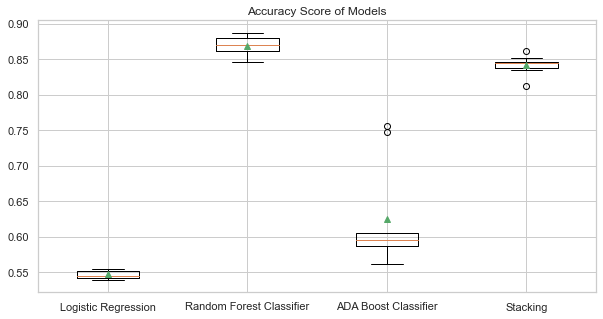

In [40]:
#visualizatiom
names=['Logistic Regression','Random Forest Classifier','ADA Boost Classifier','Stacking']
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('Accuracy Score of Models')
plt.boxplot([m1s1,m2s1,m3s1,m4s1], labels=names, showmeans=True);

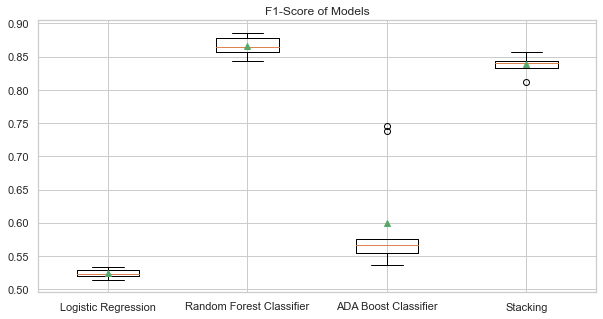

In [41]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('F1-Score of Models')
plt.boxplot([m1s2,m2s2,m3s2,m4s2], labels=names, showmeans=True);

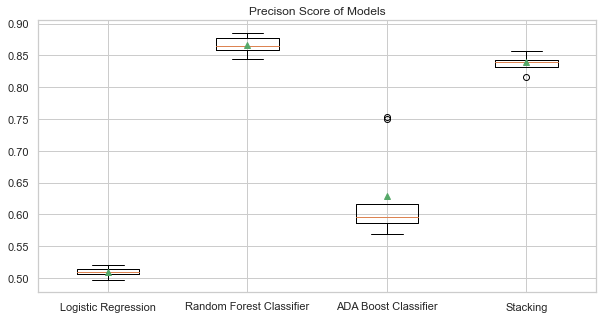

In [42]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('Precison Score of Models')
plt.boxplot([m1s3,m2s3,m3s3,m4s3], labels=names, showmeans=True);

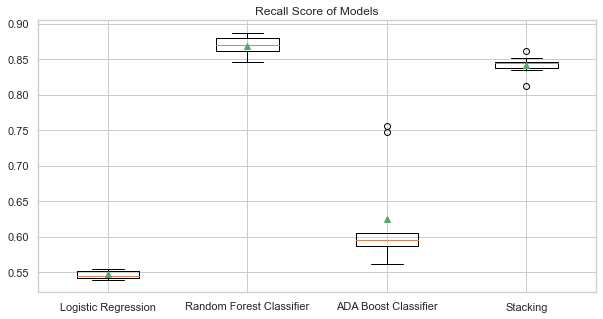

In [43]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('Recall Score of Models')
plt.boxplot([m1s4,m2s4,m3s4,m4s4], labels=names, showmeans=True);

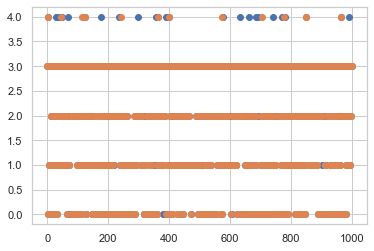

In [44]:
x=list(np.arange(0,len(y_test)))
plt.scatter(x,y_test)
plt.scatter(x,y2_pred);